# Project 1: Data Analysis of Singapore Rainfall
### Explore relationship between MRT ridership and Singapore Monsoon seasonality

## Background

According to the Meteorological Services Singapore, Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country but in this project we are going to look into one single factor, rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods. The Northeast Monsoon occurs from December to early March, and the Southwest Monsoon from June to September.

We are going to identify these monsoon seasons through the rainfall data, and to explore how this could impact the life in Singapore. In particular, how a monsoon season could impact the SMRT ridership. Rainy days will tend to cause slippery floor in the station, at the same time trains travelling under the rain might need more check and maintenance to remain in prime condition.  

This project aims to explore if monsoon season could cause an increase in ridership. This might prompt business consideration by SMRT to improve resource management and maintain its high operation standard. The considerations could include to increase train maintenance frequency during monsoon seasons, or additional manpower allocation for station maintenance due to potential slippery floor. 

The rainfall dataset used in the project comes from data.gov.sg, as recorded at the Changi climate station  
The SMRT ridership dataset used in the project comes from https://www.sbstransit.com.sg/ridership, as recorded by SBS Transit.

### Data Selection

There are 3 datasets included in the [`data`](./data/) folder for this project. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022
* [`smrt_ridership.csv`](./data/smrt_ridership.csv): Monthly average ridership from 2014 to 2023

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm| 
|no_of_rainy_days|integer|rainfall-monthly-number-of-rain-days|Number of rainy days in the month| 
|no_rider|integer|smrt_ridership|Average number of rider in the month| 
|no_rider_prev|integer|smrt_ridership|Average number of rider in the previous month| 
|rider_change|integer|smrt_ridership|Relative change in ridership from the previous month | 

## Data import and cleaning

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read and review data
rainfall_days = pd.read_csv('./data/rainfall-monthly-number-of-rain-days.csv')
print(rainfall_days.head())

rainfall_vol = pd.read_csv('./data/rainfall-monthly-total.csv')
print(rainfall_vol.head())

     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10
     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2


In [3]:
# check for null values
print(rainfall_days.isnull().sum())
print(rainfall_vol.isnull().sum())

month               0
no_of_rainy_days    0
dtype: int64
month             0
total_rainfall    0
dtype: int64


In [4]:
# check for shape before merging
print(rainfall_days.shape)
print(rainfall_vol.shape)

(488, 2)
(488, 2)


In [5]:
# merge the two dataframe into one, and check
rainfall = rainfall_days.merge(rainfall_vol, on='month')
rainfall.head()

,month,no_of_rainy_days,total_rainfall
0,1982-01,10,107.1
1,1982-02,5,27.8
2,1982-03,11,160.8
3,1982-04,14,157.0
4,1982-05,10,102.2


In [6]:
# check for shape to ensure no missing rows
rainfall.shape

(488, 3)

In [7]:
rainfall['60MA'] = rainfall['total_rainfall'].rolling(60).mean()

In [8]:
# rename column and convert to datetime for conveninet operation later

rainfall.rename(columns={'month':'date'}, inplace=True)
rainfall['date'] = pd.to_datetime(rainfall['date'])

# then add "month" and "year" columns for analysis later

rainfall['month'] = rainfall['date'].dt.strftime('%b')
rainfall['year'] = rainfall['date'].dt.strftime('%Y')
rainfall['year'] = rainfall['year'].astype(int)

# verify the change

rainfall.dtypes

date                datetime64[ns]
no_of_rainy_days             int64
total_rainfall             float64
60MA                       float64
month                       object
year                         int32
dtype: object

## Exploratory Data Analysis

In [9]:
# Below summary statistic

rainfall.describe()

,no_of_rainy_days,total_rainfall,60MA,year
count,488.000000,488.000000,429.000000,488.000000
mean,14.061475,177.163730,178.524079,2001.836066
std,4.947394,113.916029,15.155674,11.752660
min,1.000000,0.200000,136.136667,1982.000000
25%,11.000000,93.850000,169.251667,1992.000000
50%,14.000000,159.450000,181.168333,2002.000000
75%,18.000000,238.075000,189.791667,2012.000000
max,27.000000,765.900000,203.861667,2022.000000


From the above summary, it shows that in the given dataset, Singapore on average has about 14 days rainy day and 177mm total rainfall a month.  
Interestingly, it looks like there was a month that only had one rainy day, and there was even a month that has total rainfall of merely 0.2.  
We will explore more of these potential outliners via box plot later.

In [10]:
# Following instructions in starter-code, below functions for mean and standard deviation without using any "mean" method

def ave(num):
    return np.sum(num)/len(num)

def sd(num):
    squared = []
    for n in num:
        x = (n-ave(num))**2
        squared.append(x)
    return (np.sum(squared) / len(num))**0.5

# using both mean and standard deviation method from numpy to verify the function

list = [1,2,3,4,5]

print(ave(list) == np.mean(list))
print(sd(list) == np.std(list))

True
True


In [11]:
# following instructions in starter-code, below codes to create a dictionary with the respesctive column name
# and the respective standard deviation value, using the functions created above
dict = {}

dict = {rainfall.columns[1]:sd(rainfall[rainfall.columns[1]]), 
        rainfall.columns[2]:sd(rainfall[rainfall.columns[2]])
       }

# to verify the values in the dictionary, compare and match to the summary statistic above 
dict


{'no_of_rainy_days': 4.94232219132241, 'total_rainfall': 113.79925170470052}

Above values are slightly different from the values in the summary statistic (4.947394 & 113.916029)  
This is because, in the summary statstics, the standard deviation calculation includes a Delta Degree of Freedom of 1, which refers to N-1  
However, in the function created following the standard deviation formula in the starter-code, we keep the N unchanged (ie. no Delta Degree of Freedom)

In [12]:
# below we explore the given year in the list of years, the respective highest and lowest rainfall month for the year

years = [1990, 2000, 2010, 2020]
for year in years:
    max = rainfall[rainfall['date'].dt.year == year]['total_rainfall'].max()
    max_mth = rainfall[(rainfall['date'].dt.year == year) & (rainfall['total_rainfall'] == max)]['month'].item()
    min = rainfall[rainfall['date'].dt.year == year]['total_rainfall'].min()
    min_mth = rainfall[(rainfall['date'].dt.year == year) & (rainfall['total_rainfall'] == min)]['month'].item()
    print(f'for the year of {year} the month of {max_mth} have the highest rainfall of {max} while the month of {min_mth} have the lowest rainfall of {min}')


for the year of 1990 the month of Sep have the highest rainfall of 204.5 while the month of Feb have the lowest rainfall of 24.1
for the year of 2000 the month of Nov have the highest rainfall of 385.7 while the month of Sep have the lowest rainfall of 81.1
for the year of 2010 the month of Jul have the highest rainfall of 298.5 while the month of Feb have the lowest rainfall of 6.3
for the year of 2020 the month of May have the highest rainfall of 255.6 while the month of Feb have the lowest rainfall of 65.0


From the above, it looks like Februrary tends to have the lowest rainfall, while the later part of the year tends to have higher rainfall  

In [13]:
rainfall.head()

,date,no_of_rainy_days,total_rainfall,60MA,month,year
0,1982-01-01,10,107.1,NaN,Jan,1982
1,1982-02-01,5,27.8,NaN,Feb,1982
2,1982-03-01,11,160.8,NaN,Mar,1982
3,1982-04-01,14,157.0,NaN,Apr,1982
4,1982-05-01,10,102.2,NaN,May,1982


In [14]:
# explore which year have the higest/lowest total rainfall in current date range of analysis
# groupby year then apply summation on total_rainfall
# return a series, sort and take the top and last value as max and min

max_vol_year = rainfall.groupby('year')['total_rainfall'].sum().sort_values(ascending=False).index[0]
min_vol_year = rainfall.groupby('year')['total_rainfall'].sum().sort_values(ascending=False).index[-1]
print(f'the year of {max_vol_year} recorded the highest total rainfall, while the year {min_vol_year} recorded the lowest')

the year of 2007 recorded the highest total rainfall, while the year 1997 recorded the lowest


In [15]:
# below we explore the given year in the list of years, the respective highest and lowest number of rainy days month for the year

years = [1990, 2000, 2010, 2020]
for year in years:
    max = rainfall[rainfall['date'].dt.year == year]['no_of_rainy_days'].max()
    max_mth = rainfall[(rainfall['date'].dt.year == year) & (rainfall['no_of_rainy_days'] == max)]['month'].values
    min = rainfall[rainfall['date'].dt.year == year]['no_of_rainy_days'].min()
    min_mth = rainfall[(rainfall['date'].dt.year == year) & (rainfall['no_of_rainy_days'] == min)]['month'].values
    print(f'for the year {year} the month {max_mth} have the highest number of rainy days of {max} while the month {min_mth} have the lowest number of rainy days of {min}')


for the year 1990 the month ['Sep' 'Nov'] have the highest number of rainy days of 17 while the month ['Mar'] have the lowest number of rainy days of 4
for the year 2000 the month ['Nov'] have the highest number of rainy days of 21 while the month ['May'] have the lowest number of rainy days of 10
for the year 2010 the month ['Nov'] have the highest number of rainy days of 21 while the month ['Feb'] have the lowest number of rainy days of 4
for the year 2020 the month ['Jul'] have the highest number of rainy days of 22 while the month ['Jan'] have the lowest number of rainy days of 6


From the above, it shows that most of the rainy days are concentrated in the month of September to November  
While the dry period is concentrated around January to March for the year  
This actually **does not coincide** with what Meteorological Services Singapore mentioned, that "The Northeast Monsoon occurs from December to early March, and the Southwest Monsoon from June to September."  
However, just by looking at maximum and minimum values **might not be sufficient** to determine the actual Monsoon seasons, we will need the help of chart to identify the other values of the year to determine the seasonality.

In [16]:
# below first attempt, though same result but might not be the most accurate
# max_year = rainfall[rainfall['no_of_rainy_days'] == rainfall['no_of_rainy_days'].max()]['date'].dt.year.item()
# min_year = rainfall[rainfall['no_of_rainy_days'] == rainfall['no_of_rainy_days'].min()]['date'].dt.year.item()
# print(f'the year of {max_year} recorded the highest number of rainy days, while the year {min_year} recorded the lowest')

# below second attempt
# explore which year have the higest/lowest total rainfall in current date range of analysis

max_num_year = rainfall.groupby('year')['no_of_rainy_days'].sum().sort_values(ascending=False).index[0]
min_num_year = rainfall.groupby('year')['no_of_rainy_days'].sum().sort_values(ascending=False).index[-1]
print(f'the year of {max_num_year} recorded the highest number of rainy days, while the year {min_num_year} recorded the lowest')

the year of 2013 recorded the highest number of rainy days, while the year 1997 recorded the lowest


## Data Visualisation

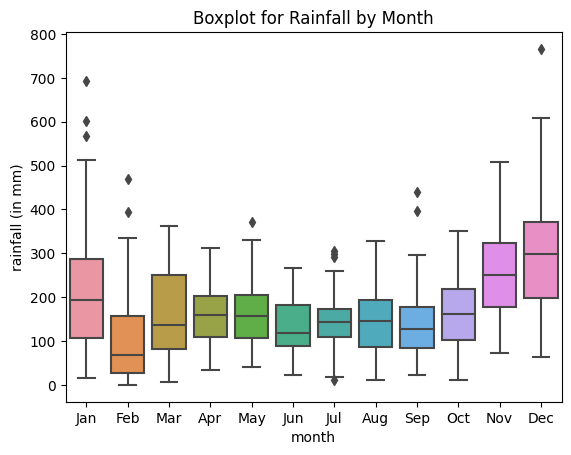

In [17]:
# below we would use the boxplot to identify outliners in the respective month

sns.boxplot(data=rainfall, x='month', y='total_rainfall')
plt.title('Boxplot for Rainfall by Month')
plt.ylabel('rainfall (in mm)')
plt.show()

From the above boxplot, it looks like the months of Jan, Feb, May, Jul, Sep and Dec tend to have outliners.  
Among them, January and July look to have the most number of outliners.

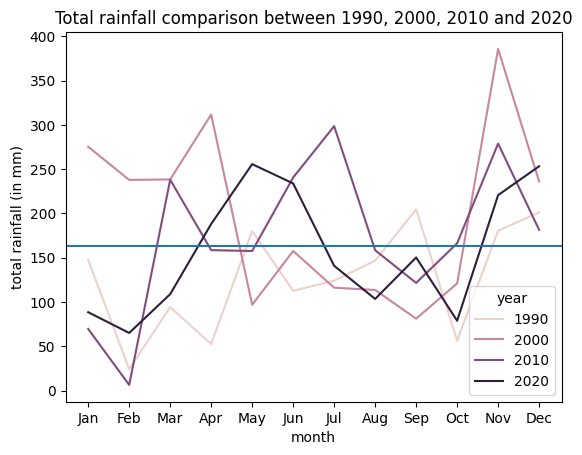

In [18]:
# isolate only the data in 1990, 2000, 2010 and 2020
rainfall_plot = rainfall[rainfall['year'].isin(years)]

sns.lineplot(data = rainfall_plot, x='month',y='total_rainfall', hue='year')
plt.title('Total rainfall comparison between 1990, 2000, 2010 and 2020')
plt.axhline(rainfall_plot['total_rainfall'].mean()) # an average line to for clearer presentation
plt.ylabel('total rainfall (in mm)')
plt.show()

Above is a line plot to show the total rainfall across the months for the years in 1990, 2000, 2010 and 2020, it seems like the rainfall concentrated in the months of **November to December**, and **June to July**, while the period around **January to March** is relatively drier. Let us expand this to other years for verification.

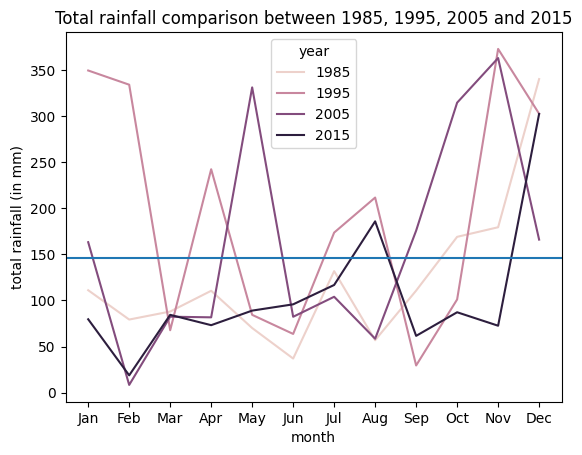

In [19]:
# isolate only the data in 1985, 1995, 2005 and 2015
years2 = [1985, 1995, 2005, 2015]
rainfall_plot2 = rainfall[rainfall['year'].isin(years2)]

sns.lineplot(data = rainfall_plot2, x='month',y='total_rainfall', hue='year')
plt.axhline(rainfall_plot2['total_rainfall'].mean()) # an average line to for clearer presentation
plt.title('Total rainfall comparison between 1985, 1995, 2005 and 2015')
plt.ylabel('total rainfall (in mm)')
plt.show()

It would be safe to say that, we do indeed see more rainfall in the months from **November to December**, and some relative smaller spikes in the months of **May to August**. 

Bringing back the information from earlier, we have verified that "The Northeast Monsoon occurs from December to early March, and the Southwest Monsoon from June to September." is relatively accurate, according to the data given.  

With the above seasonality identified, let's dive into the dataset on SMRT ridership and attempt to identify any business insights

## Business Case
##### How SMRT might be able to use monsoon seasonality in operational planning to uphold its high service standard

### Data import and cleaning

In [20]:
# loading SMRT ridership dataset
ridership = pd.read_csv('./data/sbs_ridership.csv')
ridership.head()

,Month,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,January,"649,460","686,426","875,831","934,363","1,142,026","1,250,833","1,195,131","844,322","848,905","1,088,294"
1,February,"627,959","691,918","859,465","948,224","1,141,750","1,186,795","1,016,292","853,580","781,820","1,177,836"
2,March,"637,010","688,147","880,966","955,433","1,144,294","1,217,877","923,319","882,892","853,049","1,163,149"
3,April,"637,727","689,305","879,413","937,046","1,149,121","1,213,490","288,664","897,317","930,979","1,137,194"
4,May,"641,864","696,010","886,145","925,537","1,146,071","1,201,397","195,515","621,167","974,217","1,181,419"


In [21]:
# extract the columns data
col = ridership.columns
col = col[1:]

In [22]:
# changing dataset from wide to long
ridership = pd.melt(ridership, id_vars='Month', value_vars=col)


In [23]:
# data exploration and cleaning

ridership.rename(columns={'Month':'month', 'variable':'year', 'value':'no_rider'}, inplace=True) # changing column names
ridership = ridership[['year', 'month', 'no_rider']] # arrange sequence for easy reading
ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      120 non-null    object
 1   month     120 non-null    object
 2   no_rider  120 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB


In [24]:
# notice the numbers are stored as string and have ',' in them
# remove the ',' and convert them to integer

ridership['no_rider'] = ridership['no_rider'].str.replace(',','')
ridership[['no_rider', 'year']] = ridership[['no_rider', 'year']].astype(int) # might not need to convert year to integer though
ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      120 non-null    int32 
 1   month     120 non-null    object
 2   no_rider  120 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 2.0+ KB


It is important to note that the ridership data is a time series data.  
Which tends to have **stationarity** and trend as it is directly impacted by populationship growth, which moves in trend.  
Just by comparing the raw data is not going to offer much insights.

We can resolve this by **differencing**.  
Differencing is done by creating a new column that calculates the percentage change in ridership from the previous month.  
We can then compare the percentage change with the average monthly change, to identify periods that we see above average growth.

In [25]:
ridership['no_rider_prev'] = ridership['no_rider'].shift() # a new column that shift the data down by one row
ridership['rider_change'] = (ridership['no_rider'] - ridership['no_rider_prev'])/(ridership['no_rider_prev'])
ridership

,year,month,no_rider,no_rider_prev,rider_change
0,2014,January,649460,NaN,NaN
1,2014,February,627959,649460.0,-0.033106
2,2014,March,637010,627959.0,0.014413
3,2014,April,637727,637010.0,0.001126
4,2014,May,641864,637727.0,0.006487
...,...,...,...,...,...
115,2023,August,1240419,1220444.0,0.016367
116,2023,September,1210233,1240419.0,-0.024335
117,2023,October,1212765,1210233.0,0.002092
118,2023,November,1187278,1212765.0,-0.021016


### Data Visualisation

We can then plot the change in ridership against the month across different years.  
This would allow us to see which particular months could have above average growth in ridership.

<AxesSubplot: xlabel='month', ylabel='rider_change'>

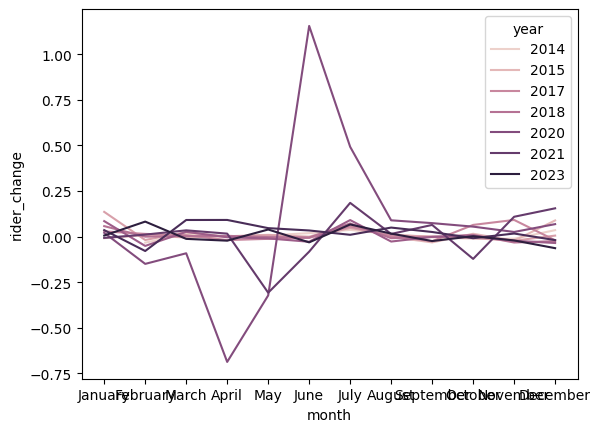

In [26]:
sns.lineplot(data=ridership, x='month', y='rider_change', hue='year')

However, on first glance, there looks to be a particular period that the change looks drastic.  
This is most likely due to covid, where less people taking the train due to social responsiblity, drastically and negatively impacted the ridership.  
Let's isolate the data before covid for easier analysis.

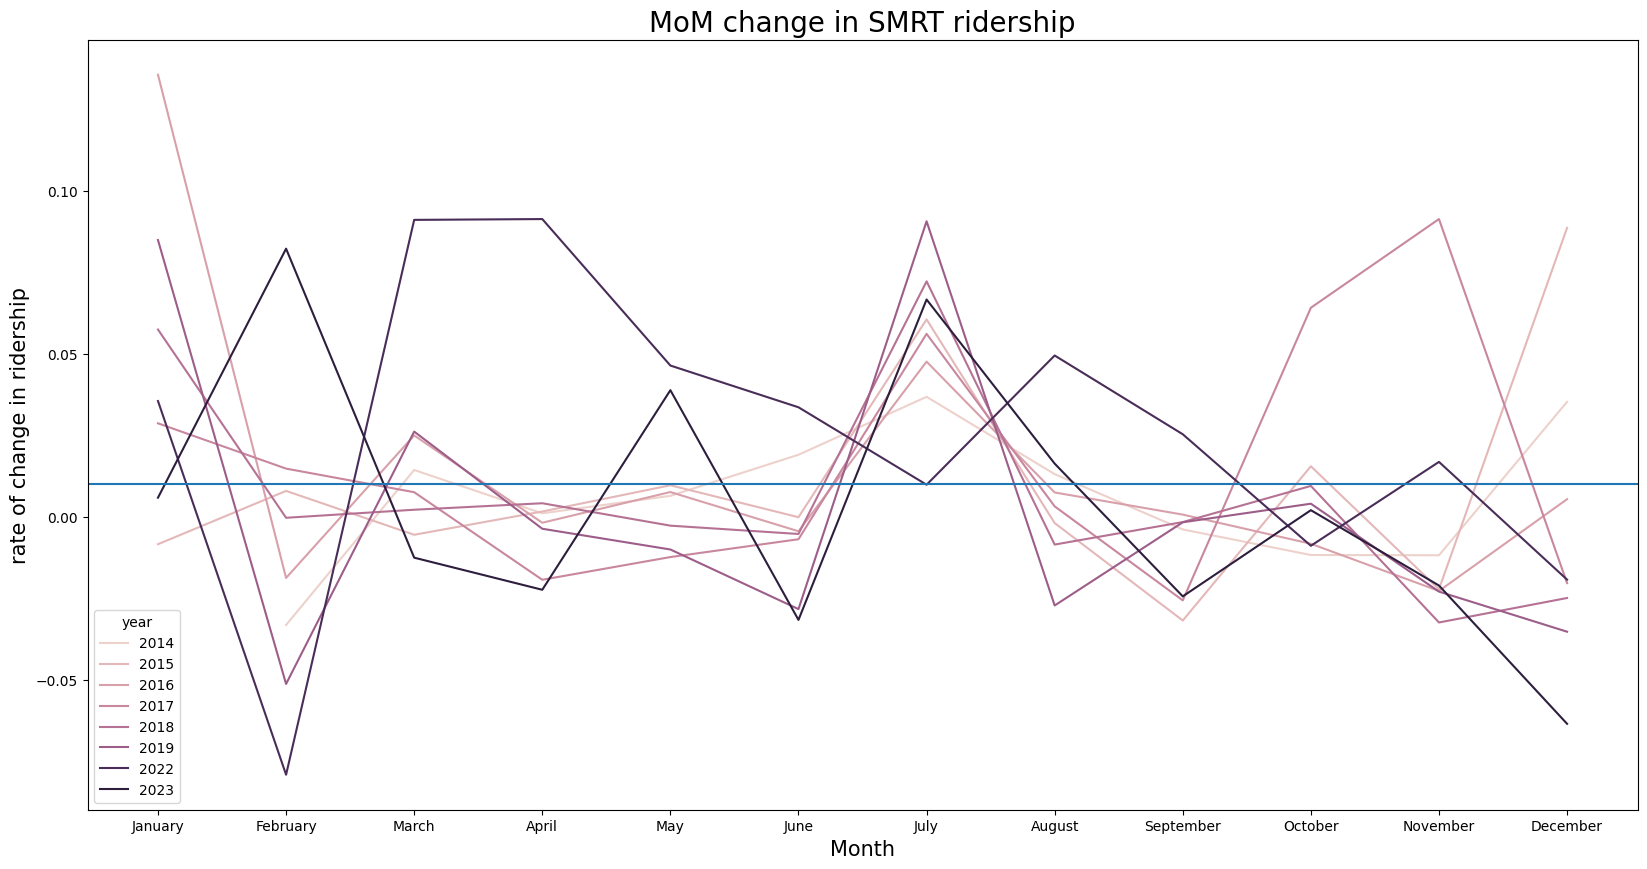

In [37]:
ridership_precovid = ridership[~ridership['year'].isin([2020, 2021])] # data set that exclude years in 2020 and 2021

plt.figure(figsize=(20,10)) # resize for better presentation
graph = sns.lineplot(data=ridership_precovid, x='month', y='rider_change', hue='year', legend='full')

graph.axhline(ridership_precovid['rider_change'].mean())   # added horizontal line as average growth rate of ridership for comparison
plt.title('MoM change in SMRT ridership', size=20)
plt.ylabel('rate of change in ridership', size=15)
plt.xlabel('Month', size=15)
plt.show()

There seems to be a consistent increase in ridership for the month of July and December from 2014 to 2023 (exclude 2020 to 2021).  
This coincides with the months identified earlier where we see relatively large rainfall. (November to December, June to August)

### Conclusion and Suggestion

From the above analysis on Singapore rainfall pattern and SMRT ridership. We can conclude that during monsoon seasons, we could expect to see an increase in SMRT ridership. This could be due to the following reasons:  

- Those who own cars might refrain from driving due to heavier traffic
- Some might not like to drive under rain condition, as they like their cars to stay clean
- Commutors who tend to take bus might change to train due to most train stations being sheltered

With the increase in ridership, it could put higher operational pressure in each station. SMRT can prevent any disruptions in service if appropriate planning and resource allocation were done beforehand. This project could act as a reference for SMRT to better plan for rainy seasons in Singapore, if they have not already done so. 

In order to maintain service quality, I would recommend an increase in train maintenance frequency and increase in staffing at the station during the monsoon seasons, particularly in the month of July and December where a consistent increase in ridership can be observed. 

**Caveat**  
It is worth noting that the increase in ridership could be due to numerous other factors, such as school holiday, year end holiday, festive seasons and more. By comparing two datasets, it is still insufficient to conclude that the increase in ridership is due to the monsoon seasonality.   

Therefore, more robust and comprehensive studies are still needed to decipher what could cause the change in ridership. However, I still hope that this project can offer some insights in one of the many factors that affect the ridership.

I also like to point out that business impact analysis would need to be done to verify if there was a decrease in service quality during rainy seasons without the additional staffing and maintenance suggested above. 
